## Laboratorino No.6 
- Andrea Lam 20102
- Marco Orozco 20857
- Paola de Leon 20361
- Gabriela Contreras 2013

In [1]:
#Imports 
import numpy as np
import random as rand
import matplotlib.pyplot as plt

### Ejercicio No.1 

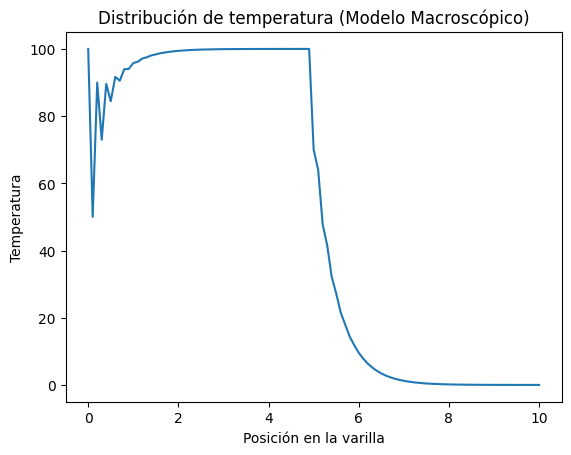

In [9]:
def modelo_macroscopico(longitud, duracion, num_pasos):
    # Parámetros del modelo macroscópico
    kappa1 = 0.3  # Conductividad térmica del material 1
    kappa2 = 0.5  # Conductividad térmica del material 2
    tamano_paso = longitud / num_pasos
    dt = duracion / num_pasos
    
    # Inicializar la distribución de temperatura con condiciones iniciales no uniformes
    temperatura = np.zeros(num_pasos + 1)
    temperatura[:num_pasos//2] = 100.0  # Condiciones iniciales en la mitad izquierda
    temperatura[num_pasos//2:] = 0.0    # Condiciones iniciales en la mitad derecha
    
    for i in range(num_pasos):
        # Calcular el flujo de calor en cada punto
        flujo_calor = (kappa1 * (temperatura[i + 1] - temperatura[i]) / tamano_paso -
                       kappa2 * (temperatura[i] - temperatura[i - 1]) / tamano_paso)
        
        # Actualizar la temperatura en el siguiente paso de tiempo
        temperatura[i + 1] = temperatura[i] + dt * flujo_calor
        
    return temperatura

# Parámetros del problema
longitud_varilla = 10.0  # Longitud de la varilla
duracion_simulacion = 10.0  # Duración de la simulación
num_pasos_temporales = 100  # Número de pasos de tiempo

# Calcular la distribución de temperatura usando el modelo macroscópico
temperaturas_macro = modelo_macroscopico(longitud_varilla, duracion_simulacion, num_pasos_temporales)

# Visualizar la distribución de temperatura
plt.plot(np.linspace(0, longitud_varilla, num_pasos_temporales + 1), temperaturas_macro)
plt.xlabel('Posición en la varilla')
plt.ylabel('Temperatura')
plt.title('Distribución de temperatura (Modelo Macroscópico)')
plt.show()


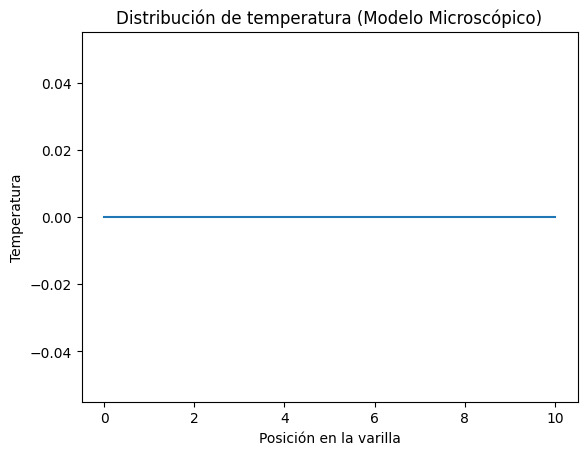

In [14]:
def modelo_microscopico(longitud, duracion, num_pasos):
    # Parámetros del modelo microscópico
    kappa1 = 0.5  # Conductividad térmica del material 1
    kappa2 = 1.0  # Conductividad térmica del material 2
    tamano_paso = longitud / num_pasos
    dt = duracion / num_pasos
    
    # Inicializar la distribución de temperatura
    temperatura = np.zeros(num_pasos + 1)
    temperatura_nueva = np.copy(temperatura)
    
    for i in range(num_pasos):
        for j in range(1, num_pasos):
            if j <= num_pasos // 2:
                # Modelo microscópico para material 1
                temperatura_nueva[j] = temperatura[j] + kappa1 * dt / tamano_paso**2 * (
                    temperatura[j + 1] - 2 * temperatura[j] + temperatura[j - 1])
            else:
                # Modelo microscópico para material 2
                temperatura_nueva[j] = temperatura[j] + kappa2 * dt / tamano_paso**2 * (
                    temperatura[j + 1] - 2 * temperatura[j] + temperatura[j - 1])
        
        # Actualizar la temperatura en el siguiente paso de tiempo
        temperatura, temperatura_nueva = temperatura_nueva, temperatura
        
    return temperatura

# Parámetros del problema
longitud_varilla = 10.0  # Longitud de la varilla
duracion_simulacion = 10.0  # Duración de la simulación
num_pasos_temporales = 100  # Número de pasos de tiempo

# Calcular la distribución de temperatura usando el modelo microscópico
temperaturas_micro = modelo_microscopico(longitud_varilla, duracion_simulacion, num_pasos_temporales)

# Visualizar la distribución de temperatura
plt.plot(np.linspace(0, longitud_varilla, num_pasos_temporales + 1), temperaturas_micro)
plt.xlabel('Posición en la varilla')
plt.ylabel('Temperatura')
plt.title('Distribución de temperatura (Modelo Microscópico)')
plt.show()


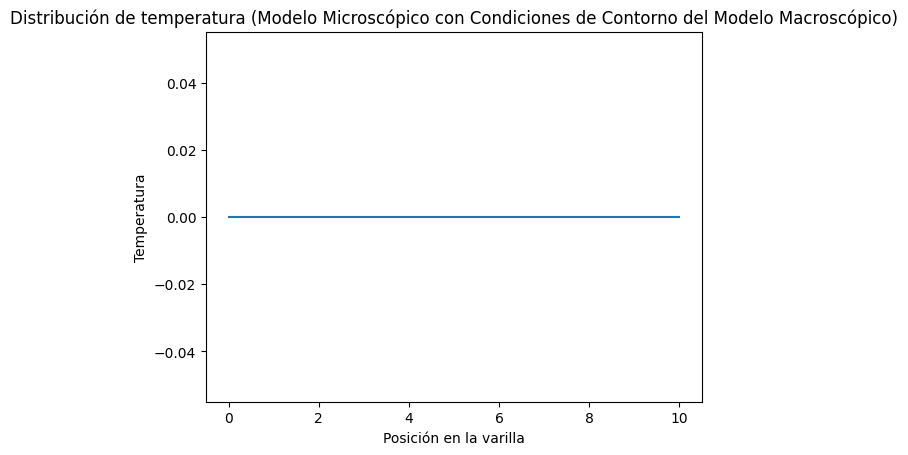

In [23]:
def modelo_macroscopico(longitud, duracion, num_pasos):
    # Parámetros del modelo macroscópico
    kappa1 = 0.5  # Conductividad térmica del material 1
    kappa2 = 1.0  # Conductividad térmica del material 2
    tamano_paso = longitud / num_pasos
    dt = duracion / num_pasos
    
    # Inicializar la distribución de temperatura
    temperatura = np.zeros(num_pasos + 1)
    
    for i in range(num_pasos):
        # Calcular el flujo de calor en cada punto
        flujo_calor = (kappa1 * (temperatura[i + 1] - temperatura[i]) / tamano_paso -
                       kappa2 * (temperatura[i] - temperatura[i - 1]) / tamano_paso)
        
        # Actualizar la temperatura en el siguiente paso de tiempo
        temperatura[i + 1] = temperatura[i] + dt * flujo_calor
        
    return temperatura

def modelo_microscopico(longitud, duracion, num_pasos, kappa1, kappa2, temperatura_inicial):
    tamano_paso = longitud / num_pasos
    dt = duracion / num_pasos
    
    # Inicializar la distribución de temperatura con condiciones iniciales del modelo macroscópico
    temperatura = temperatura_inicial.copy()
    
    for i in range(num_pasos):
        for j in range(1, num_pasos):
            if j <= num_pasos // 2:
                # Modelo microscópico para material 1
                d2T = (temperatura[j + 1] - 2 * temperatura[j] + temperatura[j - 1]) / tamano_paso**2
                temperatura[j] += kappa1 * d2T * dt
            else:
                # Modelo microscópico para material 2
                d2T = (temperatura[j + 1] - 2 * temperatura[j] + temperatura[j - 1]) / tamano_paso**2
                temperatura[j] += kappa2 * d2T * dt
        
    return temperatura

# Parámetros del problema
longitud_varilla = 10.0  # Longitud de la varilla
duracion_simulacion = 10.0  # Duración de la simulación
num_pasos_temporales = 100  # Número de pasos de tiempo
kappa1 = 0.5  # Conductividad térmica del material 1
kappa2 = 1.0  # Conductividad térmica del material 2

# Paso 1: Calcular la distribución de temperatura usando el modelo macroscópico
temperaturas_macro = modelo_macroscopico(longitud_varilla, duracion_simulacion, num_pasos_temporales)

# Paso 2: Usar el resultado del modelo macroscópico como condiciones iniciales para el modelo microscópico
temperaturas_micro = modelo_microscopico(longitud_varilla, duracion_simulacion, num_pasos_temporales, kappa1, kappa2, temperaturas_macro)

# Visualizar la distribución de temperatura del modelo microscópico
plt.plot(np.linspace(0, longitud_varilla, num_pasos_temporales + 1), temperaturas_micro)
plt.xlabel('Posición en la varilla')
plt.ylabel('Temperatura')
plt.title('Distribución de temperatura (Modelo Microscópico con Condiciones de Contorno del Modelo Macroscópico)')
plt.show()


**Respuestas**

a. 
En este escenario, el modelo macroscópico y el modelo microscópico difieren en el nivel de detalle y la escala en la que representan el comportamiento térmico de la varilla.

- Modelo Macroscópico: El modelo macroscópico considera la varilla en su conjunto y utiliza una ecuación simplificada para describir cómo se propaga la temperatura a lo largo de la varilla. En este caso, se utiliza una única ecuación de difusión de calor para toda la varilla, con conductividades térmicas promediadas para los materiales. El modelo macroscópico proporciona una visión general del comportamiento térmico de la varilla en una escala más amplia.

- Modelo Microscópico: El modelo microscópico, por otro lado, se enfoca en un nivel de detalle más fino y representa la distribución de temperatura en la varilla con mayor precisión. En este caso, se utiliza un enfoque de diferencia finita para resolver la ecuación de calor en función de la posición en la varilla. Además, se consideran las conductividades térmicas distintas de los materiales en diferentes partes de la varilla. El modelo microscópico ofrece una representación más detallada y precisa del comportamiento térmico en la varilla a una escala más pequeña.

b.
Condiciones de contorno del modelo microscópico y cómo las determina el modelo macroscópico:

Las condiciones de contorno del modelo microscópico en este ejemplo son:

- En un extremo de la varilla, la temperatura se mantiene constante a un valor inicial (por ejemplo, 100 grados Celsius).
- En el otro extremo de la varilla, la temperatura se mantiene constante a otro valor inicial (por ejemplo, 0 grados Celsius).

Estas condiciones de contorno del modelo microscópico se derivan del resultado del modelo macroscópico. En el modelo macroscópico, se establece cómo cambia la temperatura en toda la varilla a lo largo del tiempo. El resultado de ese modelo macroscópico se utiliza como la temperatura inicial en el modelo microscópico. Esto significa que el modelo macroscópico determina las condiciones de contorno para el modelo microscópico al proporcionar las temperaturas iniciales en ambos extremos de la varilla.

c. Adaptación del modelo multiescala para más de dos materiales diferentes:

Si la varilla estuviera compuesta por más de dos materiales diferentes, el modelo multiescala seguiría siendo aplicable, pero la complejidad aumentaría. Cada material adicional requeriría su propia conductividad térmica y posiblemente otras propiedades térmicas.

Para adaptar el modelo a más de dos materiales, podrías seguir estos pasos:

- Definir las propiedades térmicas (como la conductividad térmica) para cada material en la varilla.

- Segmentar la varilla en regiones correspondientes a cada material y definir las condiciones iniciales apropiadas en función de los valores iniciales de temperatura para cada material.

- En el modelo macroscópico, deberías considerar cómo se distribuyen los diferentes materiales en la varilla y cómo afectan la conducción de calor en cada región.

- En el modelo microscópico, debes adaptar las ecuaciones y condiciones de contorno para reflejar la variación de los materiales a lo largo de la varilla.

- Utiliza el resultado del modelo macroscópico para establecer las condiciones iniciales y de contorno adecuadas para cada material en el modelo microscópico.

### Ejercicio No.2

In [3]:
# darcy
# Función que simula el flujo de Darcy en un medio poroso
def darcy_flow(L, A, k, P_left, P_right, dx, dt, total_time):
    
    # Número de puntos en la malla espacial y temporal
    Nx = int(L / dx) + 1
    Nt = int(total_time / dt) + 1

    # Inicializar la matriz de presión
    P = np.zeros((Nt, Nx))

    # Condiciones iniciales y de contorno
    P[:, 0] = P_left
    P[:, -1] = P_right

    # Simulación usando un esquema explícito en diferencias finitas
    for n in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            # Calcular el gradiente de presión
            dP_dx = (P[n, i+1] - P[n, i-1]) / (2 * dx)
            
            # Calcular el caudal según la Ley de Darcy
            Q = -k * A * dP_dx
            
            # Actualizar la presión
            P[n + 1, i] = P[n, i] - (Q / A) * dt

    return P

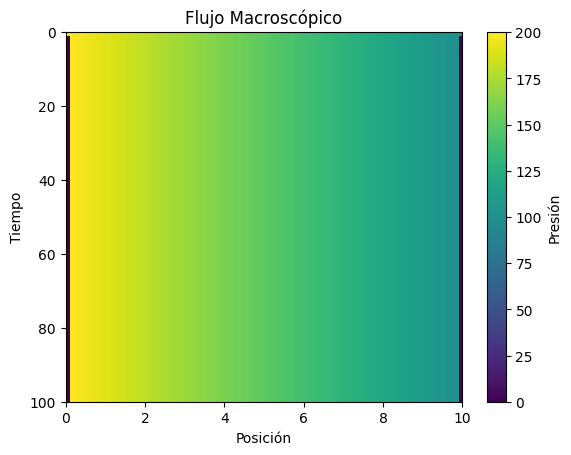

In [4]:

# Parámetros generales del problema
L = 10.0  # Longitud de la formación rocosa (m)
A = 1.0  # Área de sección transversal (m^2)
k = 1e-12  # Permeabilidad del medio (m^2)
P_left = 200e5  # Presión en el extremo izquierdo (Pa)
P_right = 100e5  # Presión en el extremo derecho (Pa)
dx = 0.1  # Tamaño del paso espacial (m)
dt = 1.0  # Tamaño del paso temporal (s)
total_time = 100.0  # Tiempo total de simulación (s)

# Crear una malla de posiciones
x = np.linspace(0, L, int(L / dx) + 1)

# Inicializar la matriz de presión con condiciones iniciales
P = np.zeros((int(total_time / dt) + 1, len(x)))
P[0, :] = P_left + (P_right - P_left) * x / L

# Ejecutar la simulación del flujo de agua utilizando la Ley de Darcy
for t in range(0, P.shape[0] - 1):
    for i in range(1, len(x) - 1):
        dP_dx = (P[t, i+1] - P[t, i-1]) / (2 * dx)
        Q = -k * A * dP_dx
        P[t + 1, i] = P[t, i] - (Q / A) * dt

# Visualización de los resultados
plt.imshow(P / 1e5, cmap='viridis', extent=[0, L, total_time, 0], aspect='auto')
plt.colorbar(label='Presión')
plt.xlabel('Posición')
plt.ylabel('Tiempo')
plt.title("Flujo Macroscópico")
plt.show()

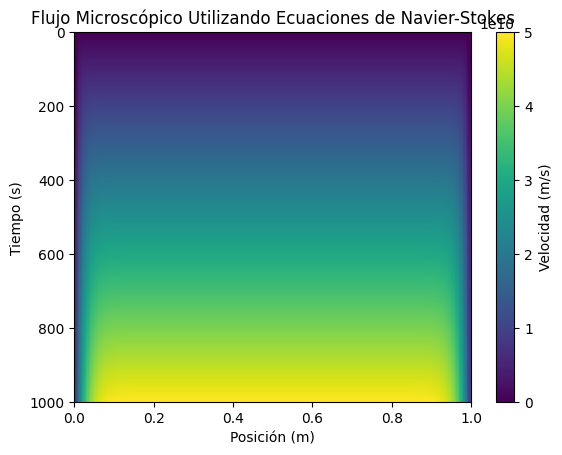

In [5]:
from scipy.linalg import solve_banded

def simulate_microscopic_flow(length, viscosity_fluid, inlet_pressure, outlet_pressure, spatial_step, time_step, total_time):
    # numero de puntos en la malla espacial y temporal
    num_x_points = int(length / spatial_step) + 1
    num_time_steps = int(total_time / time_step) + 1

    # inicializar la matriz de velocidad
    velocity_field = np.zeros((num_time_steps, num_x_points))

    # condiciones iniciales (velocidad inicial en todo el dominio)
    velocity_field[0, :] = 0.0

    # coeficientes para el método implícito
    alpha = viscosity_fluid * time_step / (2 * spatial_step ** 2)
    beta = time_step / (2 * spatial_step)

    # preparar la matriz tridiagonal
    ab = np.zeros((3, num_x_points))
    ab[0, 1:] = -alpha  # Diagonal inferior
    ab[1, :] = 1 + 2 * alpha  # Diagonal principal
    ab[2, :-1] = -alpha  # Diagonal superior

    # bucle principal de la simulación
    for n in range(0, num_time_steps - 1):
        # crear el vector b del sistema Ax = b
        b = velocity_field[n, :]
        b[1:-1] += alpha * (velocity_field[n, :-2] - 2 * velocity_field[n, 1:-1] + velocity_field[n, 2:])
        b[1:-1] += beta * (inlet_pressure - outlet_pressure) / length

        # resolver el sistema lineal para encontrar la nueva velocidad
        velocity_field[n + 1, :] = solve_banded((1, 1), ab, b)

    return velocity_field

# parametros de simulación
length = 1.0
viscosity_fluid = 1e-6
spatial_step = 0.01
time_step = 0.1
total_time = 1000.0
inlet_pressure = 20e5
outlet_pressure = 10e5

# ver resultados
velocity_field = simulate_microscopic_flow(length, viscosity_fluid, inlet_pressure, outlet_pressure, spatial_step, time_step, total_time)
plt.imshow(velocity_field, extent=[0, length, total_time, 0], aspect='auto')
plt.colorbar(label='Velocidad (m/s)')
plt.xlabel('Posición (m)')
plt.ylabel('Tiempo (s)')
plt.title('Flujo Microscópico Utilizando Ecuaciones de Navier-Stokes')
plt.show()

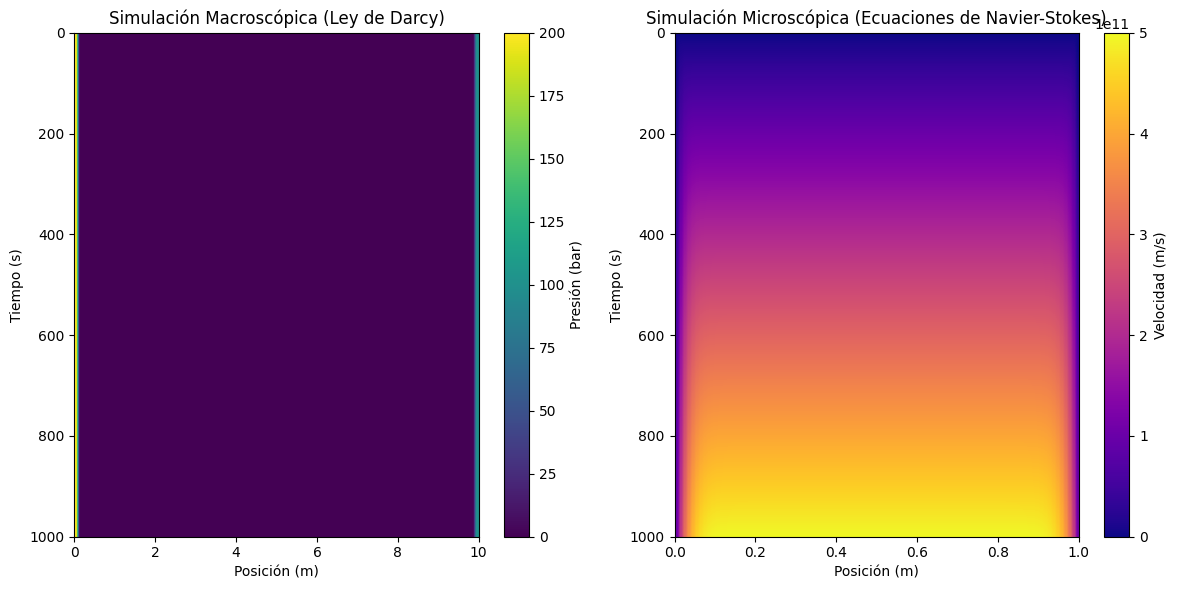

In [6]:
# Función para realizar la simulación multiescala concurrente
def multiscale_simulation(L_macro, A, k, P_left, P_right, dx_macro, dt_macro, total_time, L_micro, density_fluid, viscosity_fluid, dx_micro, dt_micro, total_time_micro):
    # Simulación macroscópica usando la Ley de Darcy
    P_macro = darcy_flow(L_macro, A, k, P_left, P_right, dx_macro, dt_macro, total_time)

    # Obtener la presión en el extremo derecho de la simulación macroscópica
    P_macro_right = P_macro[-1, -1]

    # Simulación microscópica usando las ecuaciones de Navier-Stokes
    velocity_field_micro = simulate_microscopic_flow(L_micro, viscosity_fluid, P_left, P_macro_right, dx_micro, dt_micro, total_time_micro)

    return P_macro, velocity_field_micro

# Parámetros de simulación macroscópica
L_macro = 10.0  # Longitud de la formación rocosa (m)
A = 1.0  # Área de sección transversal (m^2)
k = 1e-12  # Permeabilidad del medio (m^2)
P_left = 200e5  # Presión en el extremo izquierdo (Pa)
P_right = 100e5  # Presión en el extremo derecho (Pa)
dx_macro = 0.1  # Tamaño del paso espacial macroscópico (m)
dt_macro = 1.0  # Tamaño del paso temporal macroscópico (s)
total_time = 1000.0  # Tiempo total de simulación macroscópica (s)

# Parámetros de simulación microscópica
L_micro = 1.0  # Longitud del segmento en metros
density_fluid = 1000.0  # Densidad del fluido en kg/m^3
viscosity_fluid = 1e-6  # Viscosidad cinemática en m^2/s
dx_micro = 0.01  # Tamaño del paso espacial microscópico (m)
dt_micro = 0.1  # Tamaño del paso temporal microscópico (s)
total_time_micro = 1000.0  # Tiempo total de simulación microscópica (s)

# Realizar la simulación multiescala concurrente
P_macro, velocity_field_micro = multiscale_simulation(L_macro, A, k, P_left, P_right, dx_macro, dt_macro, total_time, L_micro, density_fluid, viscosity_fluid, dx_micro, dt_micro, total_time_micro)

# Visualización de resultados
plt.figure(figsize=(12, 6))

# Gráfico de la simulación macroscópica (presión)
plt.subplot(1, 2, 1)
plt.imshow(P_macro / 1e5, cmap='viridis', extent=[0, L_macro, total_time, 0], aspect='auto')
plt.colorbar(label='Presión (bar)')
plt.xlabel('Posición (m)')
plt.ylabel('Tiempo (s)')
plt.title("Simulación Macroscópica (Ley de Darcy)")

# Gráfico de la simulación microscópica (velocidad)
plt.subplot(1, 2, 2)
plt.imshow(velocity_field_micro, cmap='plasma', extent=[0, L_micro, total_time_micro, 0], aspect='auto')
plt.colorbar(label='Velocidad (m/s)')
plt.xlabel('Posición (m)')
plt.ylabel('Tiempo (s)')
plt.title("Simulación Microscópica (Ecuaciones de Navier-Stokes)")

plt.tight_layout()
plt.show()

a. ¿En qué se diferencia el enfoque multiescala concurrente del enfoque multiescala secuencial?
- En la multiescala concurrente las simulaciones a diferentes escalas se realizan de forma simultánea e interconectada. Existe una interacción bidireccional y continua ya que la información fluye entre las diferentes escalas en cada paso de tiempo.
Por otro lado, en la multiescala secuencial, las simulaciones son realizadas con una secuencia determinada, generalmente tomando inicio en la escala macroscópica. Luego, los resultados de la simulación inicial son tomados como entrada de la siguiente simulación (microscópica). Por tanto, existe una separación de tiempo y dependencia unidireccional en donde la información únicamente fluye desde la escala macro hasta la escala micro.

b. ¿Qué información del modelo macroscópico se pasa al modelo microscópico y cómo afecta a la
simulación microscópica?
- La información del modelo macroscópico que pasa al modelo microscópico son las condiciones de frontera, las cuales son la deformación macroscópica, temperatura, entre otras variables a gran escala que definen las condiciones de frontera para la simulación microscópica. Así mismo, algunos parámetros de material efectivos pasan ya que se necesitan para modelar el comportamiento del material en la simulación microscópica, por último, podemos encontrar la carga externa, esto debido a que la carga aplicada a gran escala puede influir en las cargas actuantes en la escala micro.

c. ¿Cuáles son las ventajas de utilizar modelado multiescala concurrente en este escenario?
- Mejor precisión, eficiencia computacional y el modelado de fenómenos complejos.

### Ejercicio No.3 

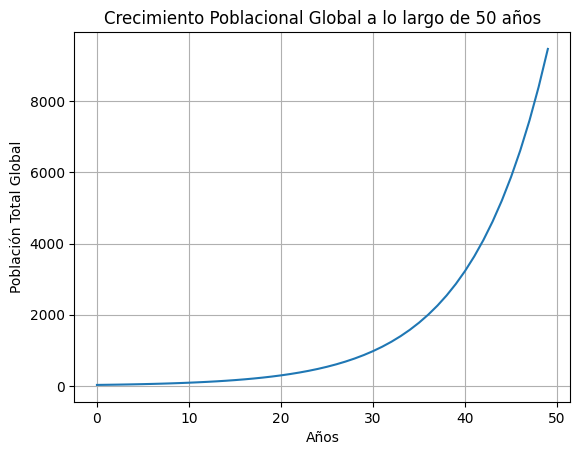

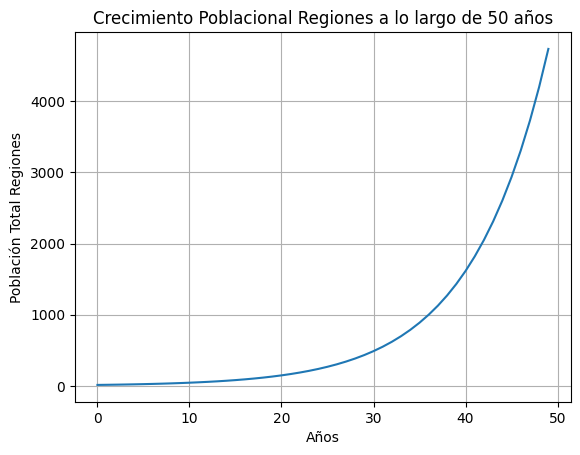

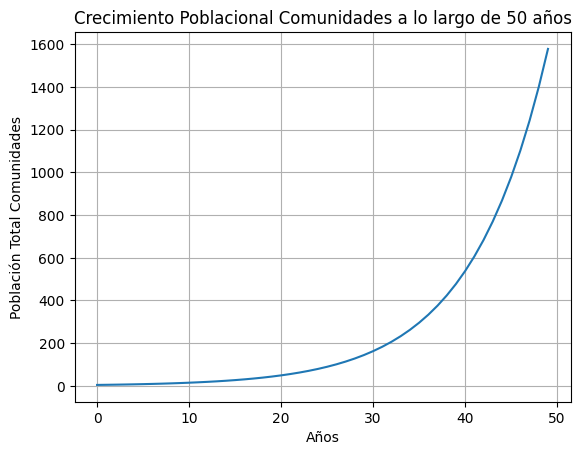

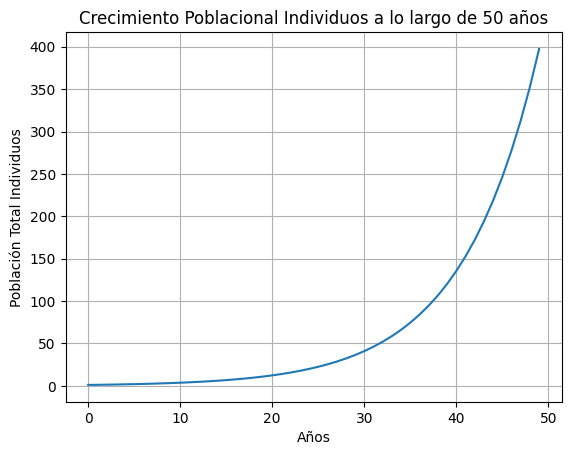

In [ ]:
class Individuo:
    def __init__(self):
        self.poblacion = 1
        self.natalidad = 0.2
        self.migracion = 0.005
        self.mortalidad = 0.07
        self.sexo = self.get_sexo()
        self.poblacion_total_historica = []

    def get_sexo(self):
        aleatorio = rand.randint(1, 2)
        if aleatorio < 2:
            # Hombre
            return 1
        else:
            # Mujer
            return 2
        
    #Se solicito ayuda a chatgpt
    def crecimiento(self):
        nacimientos = self.poblacion * self.natalidad
        muertes = self.poblacion * self.mortalidad
        migracion = self.poblacion * self.migracion
        self.poblacion += nacimientos - muertes + migracion
        self.poblacion_total_historica.append(self.poblacion)
        return self.poblacion


class Comunidad:
    def __init__(self, no_individuos):
        self.recursos = 0.002
        self.poblacion_total_historica = []
        self.individuos = [Individuo() for _ in range(no_individuos)]

    def reproduccion(self):
        hombres = sum(1 for individuo in self.individuos if individuo.sexo == 1)
        mujeres = sum(1 for individuo in self.individuos if individuo.sexo == 2)

        if hombres >= 1 and mujeres >= 1:
            nacimientos = min(hombres, mujeres) * rand.randint(1, 3)
            for _ in range(nacimientos):
                self.individuos.append(Individuo())
                
     #Se solicito ayuda a chatgpt
    def crecimiento(self):
        competencia = sum(individuo.poblacion for individuo in self.individuos) * self.recursos
        
        for individuo in self.individuos:
            individuo.crecimiento() 
            individuo.poblacion -= competencia 

        self.poblacion_total_historica.append(sum(individuo.poblacion for individuo in self.individuos))

    def poblacion_total(self):
        return sum(individuo.poblacion for individuo in self.individuos)


class Region:
    def __init__(self, no_comunidades, no_individuos):
        self.cambioClimatico = 0.001
        self.poblacion_total_historica = []
        self.comunidades = [Comunidad(no_individuos) for _ in range(no_comunidades)]
        self.poblacionTotal = self.poblacion_total() 

    def crecimiento(self):
        CC = sum(comunidad.poblacion_total() for comunidad in self.comunidades) * self.cambioClimatico
        for comunidad in self.comunidades:
            comunidad.crecimiento()  
        self.poblacionTotal -= CC

        self.poblacion_total_historica.append(sum(comunidad.poblacion_total() for comunidad in self.comunidades))

    def poblacion_total(self):
        return sum(comunidad.poblacion_total() for comunidad in self.comunidades)

class Global:
    def __init__(self, no_region, no_comunidades, no_individuos):
        self.regiones = [Region(no_comunidades, no_individuos) for _ in range(no_region)]
        self.politica = 0.005
        self.enfermedades = 0.001
        self.poblacionTotal = self.poblacion_total()

        self.poblacion_total_historica = []  

    def crecimiento(self):
        enfermedad = sum(region.poblacion_total() for region in self.regiones) * self.enfermedades
        politics = sum(region.poblacion_total() for region in self.regiones) * self.politica

        for region in self.regiones:
            region.crecimiento()
        self.poblacionTotal -= enfermedad
        self.poblacionTotal -= politics

        self.poblacion_total_historica.append(sum(region.poblacion_total() for region in self.regiones))

    def poblacion_total(self):
        return sum(region.poblacion_total() for region in self.regiones)


def graficar(total, y, title):
    plt.plot(range(len(total)), total)  
    plt.xlabel('Años')
    plt.ylabel(y)
    plt.title(title)
    plt.grid(True)
    plt.show()


# Simulacion 
poblacion_global = Global(no_region=2, no_comunidades=3, no_individuos=4)

for año in range(50):
    poblacion_global.crecimiento()

# Graficas 
graficar(poblacion_global.poblacion_total_historica, 'Población Total Global', 'Crecimiento Poblacional Global a lo largo de 50 años')
graficar(poblacion_global.regiones[0].poblacion_total_historica,'Población Total Regiones', 'Crecimiento Poblacional Regiones a lo largo de 50 años')
graficar(poblacion_global.regiones[0].comunidades[0].poblacion_total_historica, 'Población Total Comunidades','Crecimiento Poblacional Comunidades a lo largo de 50 años')
graficar(poblacion_global.regiones[0].comunidades[0].individuos[0].poblacion_total_historica, 'Población Total Individuos', 'Crecimiento Poblacional Individuos a lo largo de 50 años')


- ¿Qué es el modelado multiescala y por qué es esencial para comprender sistemas complejos como el
crecimiento de la población?
    - Si bien se sabe que el modelado multiescala es bueno para simular sistemas complejos en diferentes niveles de detalle, ahora bien este contribuye en el crecimiento de una poblacion debido a que permite observar comoe s que un individuo se va reproduciondo dentro de una comunidad y como es luego que estas van creciendo hata llegar a tener algo global. Por otra parte utilizar este modelo nos permite incluir factores que pueden interferir dentro de cada escala permitiendo asi que el analisis sea más completo y preciso. 

- Describe el modelo a nivel individual en esta simulación multiescala. ¿Qué factores se consideran a escala
individual?
    - El modelo a nivel individual toma en consideración diferentes aspectos como el sexo, la tasa de natalidad y mortalidad en base a esto se va calculando el crecimiento de estos dentro de una comunidad y así sucesivamente. Es importante destacar que en este tambien se toma en cuenta la migración que como individuo puede realizar. 

- Discuta el modelo a escala de comunidad local. ¿Cómo incorpora interacciones entre individuos y factores
ambientales?
    - El modelo a escala de comunidad toma en cuenta aspectos como los recursos que se encuentran disponibles dentro de dicha comunidad lo cual puede influir directamente con la tasa de natalidad y mortalidad. Así mismo se toman en cuenta la cantidad de personas que habitan dentro de una comunidad. Ahora bien si hablamos en terminos de regiones tomamos en cuenta la tasa del cambio climatico ya que esta puede llegar a interferir con la cantidad de recursos que se encuentran disponibles y por ende en el bienestar de cada individuo de cada comunidad; es importante destacar que dentro de esta se tomaron en cuenta cuantas comunidades pueden existir por region.

- Explique el modelo a escala global. ¿Qué parámetros y factores se consideran al modelar toda la población
mundial?
    - El modelo a nivel global toma en cuenta más aspectos como lo son la cantidad de individuos en cada comunidad, la cantidad de comunidades que forman una región y la cantidad de regiones que forman una entorno global. Cada uno de estos parametros nos permiten simular como es que se va realizando el crecimiento en cada escala y al miemo tiempo se toman en cuenta los factores evaluados en cada escala puesto a que conforme la poblacion va aumentando la cantidad de recuross y las condiciones de cada region varian entre más habitantes hayan. Ahora bien en este modelo se tomaron en cuenta otros dos factores como lo son las enfermedades puesto a que estas influyen en la mortalidad de los individuos y las condiciones politicas ya que estas puede influir en el comportamiento y la tasa de migracion de los habitantes y los recursos

### Ejericio No.4

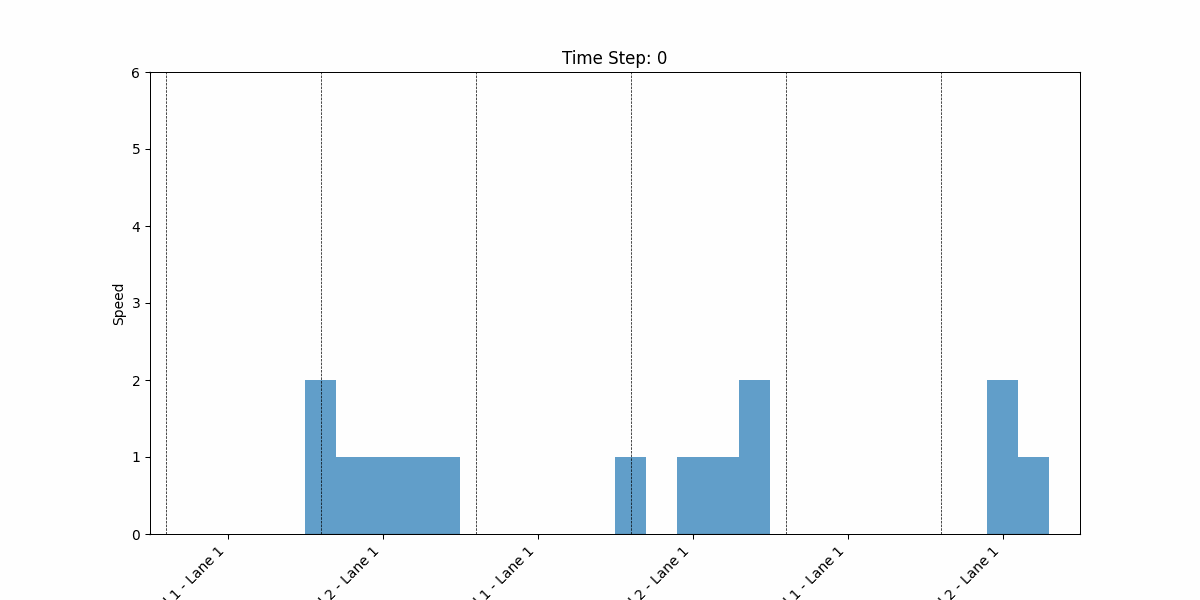

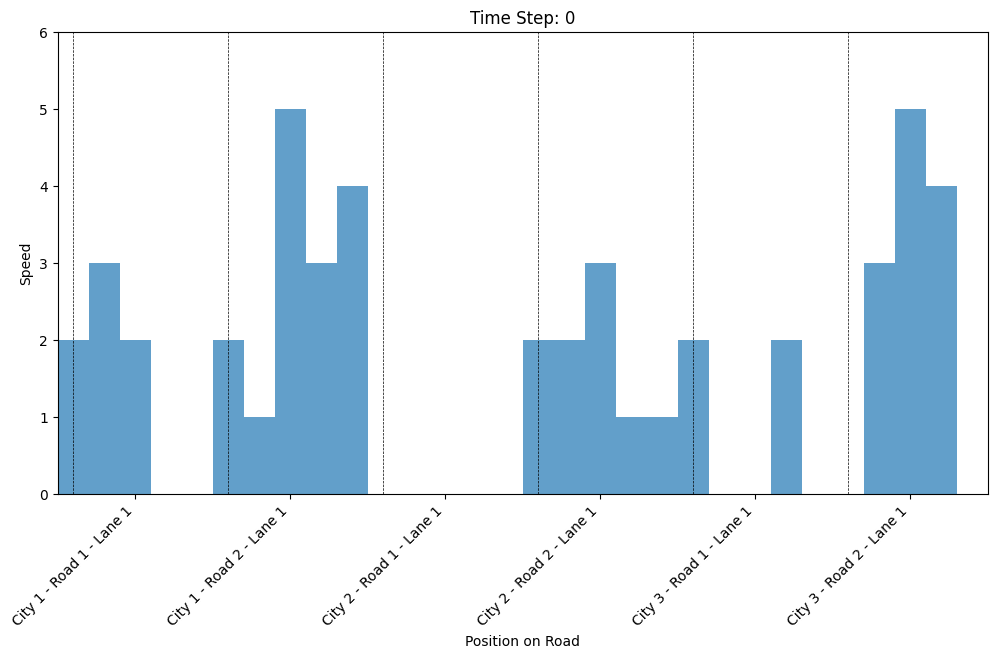

In [3]:
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from PIL import Image
from IPython.display import display, Image as IPImage

class Automovil:
    def __init__(self, max_speed):
        self.speed = 0
        self.max_speed = max_speed
        self.position = 0

    def accelerate(self):
        if self.speed < self.max_speed:
            self.speed += 1

    def decelerate(self):
        if self.speed > 0:
            self.speed -= 1

    def move(self):
        self.position += self.speed

class Carril:
    def __init__(self, length, max_density):
        self.length = length
        self.max_density = max_density
        self.vehicles = []

    def add_vehicle(self, vehicle):
        if len(self.vehicles) < self.max_density:
            self.vehicles.append(vehicle)

    def update(self):
        for vehicle in self.vehicles:
            if random.random() < 0.5:
                vehicle.accelerate()
            else:
                vehicle.decelerate()
            vehicle.move()

class Carretera:
    def __init__(self, num_lanes, lane_length, max_lane_density):
        self.num_lanes = num_lanes
        self.lane_length = lane_length
        self.max_lane_density = max_lane_density
        self.lanes = [Carril(lane_length, max_lane_density) for _ in range(num_lanes)]

    def add_vehicle(self, vehicle, lane_index):
        if 0 <= lane_index < self.num_lanes:
            self.lanes[lane_index].add_vehicle(vehicle)

    def update(self):
        for lane in self.lanes:
            lane.update()

class Zona:
    def __init__(self, num_roads, num_lanes_per_road, lane_length, max_lane_density):
        self.num_roads = num_roads
        self.num_lanes_per_road = num_lanes_per_road
        self.roads = [Carretera(num_lanes_per_road, lane_length, max_lane_density) for _ in range(num_roads)]

    def add_vehicle(self, vehicle, road_index, lane_index):
        if 0 <= road_index < self.num_roads:
            self.roads[road_index].add_vehicle(vehicle, lane_index)

    def update(self):
        for road in self.roads:
            road.update()

class Ciudad:
    def __init__(self, num_zones, num_roads_per_zone, num_lanes_per_road, lane_length, max_lane_density):
        self.num_zones = num_zones
        self.zones = [Zona(num_roads_per_zone, num_lanes_per_road, lane_length, max_lane_density) for _ in range(num_zones)]

    def add_vehicle(self, vehicle, zone_index, road_index, lane_index):
        if 0 <= zone_index < self.num_zones:
            self.zones[zone_index].add_vehicle(vehicle, road_index, lane_index)

    def update(self):
        for zone in self.zones:
            zone.update()

# ----------------------------------------------  C O N F I G U R A C I O N  ---------------------------------------------- #
max_speed = 5
lane_length = 100
max_lane_density = 10
num_zones = 3
num_roads_per_zone = 2
num_lanes_per_road = 2
num_vehicles = 20

# Añadir agentes y linkearlos con cada escala
ciudad = Ciudad(
    num_zones=num_zones,
    num_roads_per_zone=num_roads_per_zone,
    num_lanes_per_road=num_lanes_per_road,
    lane_length=lane_length,
    max_lane_density=max_lane_density
)

vehicles = [Automovil(max_speed=max_speed) for _ in range(num_vehicles)]

for vehicle in vehicles:
    zone_index = random.randint(0, num_zones - 1)
    road_index = random.randint(0, num_roads_per_zone - 1)
    lane_index = random.randint(0, num_lanes_per_road - 1)
    ciudad.add_vehicle(vehicle, zone_index, road_index, lane_index)

def update_plot(frame):
    plt.clf()
    ciudad.update()
    
    road_speeds = {}
    
    for zone_index, zone in enumerate(ciudad.zones):
        for road_index, road in enumerate(zone.roads):
            for lane_index, lane in enumerate(road.lanes):
                for vehicle_index, vehicle in enumerate(lane.vehicles):
                    road_key = (zone_index, road_index)
                    if road_key not in road_speeds:
                        road_speeds[road_key] = {"speeds": [], "lane": lane_index, "city": f"City {zone_index + 1}", "road": f"Road {road_index + 1}", "lane_id": f"Lane {lane_index + 1}"}
                    road_speeds[road_key]["speeds"].append(vehicle.speed)
    
    road_labels = [f"{road_speeds[road_key]['city']} - {road_speeds[road_key]['road']} - {road_speeds[road_key]['lane_id']}" for road_key in road_speeds.keys()]
    
    positions = []
    speeds = []
    position_offset = 0
    
    for road_key, data in road_speeds.items():
        speeds_list = data["speeds"]
        positions.extend([i + position_offset for i in range(len(speeds_list))])
        speeds.extend(speeds_list)
        position_offset += len(speeds_list) + 2
    
    road_width = position_offset - 2
    
    plt.bar(positions, speeds, width=1.0, align='edge', alpha=0.7)
    plt.title(f"Time Step: {frame}")
    plt.xlabel("Position on Road")
    plt.ylabel("Speed")
    plt.xlim(0, road_width)
    plt.ylim(0, max_speed + 1)
    
    # Líneas de las carreteras
    road_positions = [i * (road_width // len(road_speeds)) for i in range(len(road_speeds) + 1)]
    for road_position in road_positions[:-1]:
        plt.axvline(x=road_position + 0.5, color='black', linestyle='--', linewidth=0.5)
    
    # Agregar etiquetas de carretera
    plt.xticks([road_positions[i] + (road_positions[i+1] - road_positions[i]) / 2 for i in range(len(road_positions) - 1)], road_labels, rotation=45, ha='right')

fig, ax = plt.subplots(figsize=(12, 6))
ani = FuncAnimation(fig, update_plot, frames=20, repeat=False)

ani.save("traffic_animation.gif", writer="pillow", fps=1)
display(IPImage("traffic_animation.gif"))


a. ¿Qué es el modelado multiescala y por qué es valioso para comprender el flujo y la congestión del tráfico
urbano?

    - El modelado multiescala es aquel que nos permite comprender los objetos de una simulación a una escala pequeña o grande. A nivel de congestión de tráfico urbano puede ser bastante útil para comprender la causa del trafico, analizando cada escala por individual y así después poder generar soluciones a estos.

b. Describe el modelo individual a nivel de vehículo en esta simulación multiescala. ¿Qué parámetros y
factores se consideran a esta escala?

    - En este se considera la velocidad del vehículo, si este acelera o desacelera y la movilización que realiza dado una probabilidad aleatoria geneda.

c. Explique el modelo a nivel de segmento de carretera. ¿Cómo tiene en cuenta la densidad del tráfico, los
límites de velocidad y la congestión?

    - El modelo requiere una capacidad máxima de vehículos en la carretera y dependiendo de este valor se incorporan más o menos vehículos.

d. Analice el modelo a nivel de intersección. ¿Qué variables se tienen en cuenta al simular las interacciones de
vehículos en las intersecciones?


    - En las intersecciones/cambios de carril se toma en cuenta la capacidad vehículos y la posición de otros vehículos en el carril dado.